# Display wind farms and select Noupoort since it is the most central point

Good day

I am Divan van der Bank, currently doing my Master's at Stellenbosch University. I would like to perform a case study to validate whether spatial AI weather prediction can be used as a tool for wind power forecasting and whether it increases forecasting accuracy. I have selected Noupoort wind farm since it is central in South Africa, and would like to know if you would be interested in participating in the case study? It would involve sharing wind power data for any year between 2020 and now (although 2020 would be the best since I can compare it against other forecasts as well).

Please let me know if you are interested.

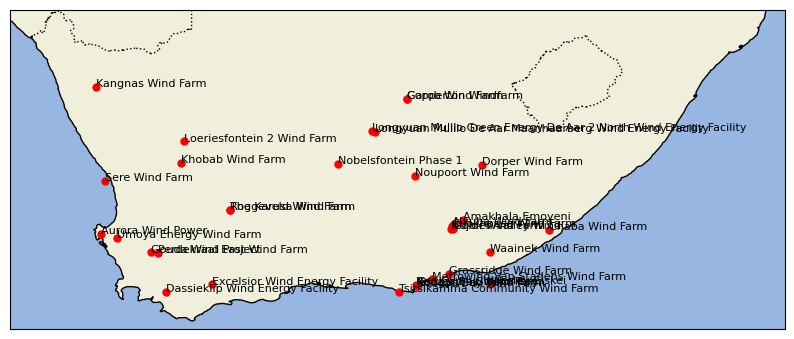

In [33]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

wind_farms = {
    "Aurora Wind Power": {"latitude": -32.9141, "longitude": 17.9911},
    "Gouda Wind Project": {"latitude": -33.3194, "longitude": 19.1000},
    "Jeffreys Bay Wind Farm": {"latitude": -34.0500, "longitude": 24.9200},
    "Nobelsfontein Phase 1": {"latitude": -31.3831, "longitude": 23.1906},
    "Sere Wind Farm": {"latitude": -31.7500, "longitude": 18.0833},
    "Amakhala Emoyeni": {"latitude": -32.6030, "longitude": 25.9280},
    "Chaba Wind Farm": {"latitude": -32.8250, "longitude": 27.8250},
    "Cookhouse Wind Farm": {"latitude": -32.7494, "longitude": 25.6931},
    "Copperton Windfarm": {"latitude": -29.9569, "longitude": 24.7083},
    "Dassieklip Wind Energy Facility": {"latitude": -34.1872, "longitude": 19.4328},
    "Dorper Wind Farm": {"latitude": -31.4072, "longitude": 26.3624},
    "Excelsior Wind Energy Facility": {"latitude": -34.0226, "longitude": 20.4417},
    "Garob Wind Farm": {"latitude": -29.9556, "longitude": 24.7081},
    "Golden Valley Wind": {"latitude": -32.7955, "longitude": 25.7254},
    "Grassridge Wind Farm": {"latitude": -33.7975, "longitude": 25.6251},
    "Kangnas Wind Farm": {"latitude": -29.6811, "longitude": 17.8778},
    "Khobab Wind Farm": {"latitude": -31.3500, "longitude": 19.7500},
    "Kouga Wind Farm": {"latitude": -34.0472, "longitude": 24.9225},
    "Loeriesfontein 2 Wind Farm": {"latitude": -30.8865, "longitude": 19.8085},
    "Longyuan Mulilo De Aar Maanhaarberg Wind Energy Facility": {"latitude": -30.6815, "longitude": 24.0125},
    "Longyuan Mulilo Green Energy De Aar 2 North Wind Energy Facility": {"latitude": -30.6485, "longitude": 23.9442},
    "Metrowind Van Stadens Wind Farm": {"latitude": -33.9126, "longitude": 25.2482},
    "Nojoli Wind Farm": {"latitude": -32.8081, "longitude": 25.6673},
    "Noupoort Wind Farm": {"latitude": -31.6381, "longitude": 24.8819},
    "Nxuba Wind Farm": {"latitude": -32.7071, "longitude": 25.7333},
    "Oyster Bay Wind Farm": {"latitude": -34.0261, "longitude": 24.9467},
    "Perdekraal East Wind Farm": {"latitude": -33.3400, "longitude": 19.2500},
    "Red Cap – Gibson Bay": {"latitude": -34.0333, "longitude": 24.9167},
    "Roggeveld Wind Farm": {"latitude": -32.3928, "longitude": 20.8311},
    "The Karusa Wind Farm": {"latitude": -32.3906, "longitude": 20.8242},
    "Tsitsikamma Community Wind Farm": {"latitude": -34.1862, "longitude": 24.5256},
    "Umoya Energy Wind Farm": {"latitude": -33.0011, "longitude": 18.3486},
    "Waainek Wind Farm": {"latitude": -33.3042, "longitude": 26.5247},
    "Wesley-Ciskei": {"latitude": -34.0167, "longitude": 26.5333}
}

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([16, 33, -35, -28], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for wind_farm, location in wind_farms.items():
    ax.plot(location['longitude'], location['latitude'], 'ro', markersize=5)
    ax.text(location['longitude'], location['latitude'], wind_farm, fontsize=8)

plt.show()

# Import the ground truth, graphcast, and Keisler

In [34]:
import xarray as xr

# Ground truth data
era_ground_data = xr.open_dataset('C:/Users/23603526/Documents/GitHub/WeatherEvaluation/data\ground_truth_era5_732x7x49x69.nc')
era_ground = {
    'name': 'era_ground',
    'data': era_ground_data

}

# AIWP models
graphcast_data = xr.open_dataset('C:/Users/23603526/Documents/GitHub/WeatherEvaluation/data/graphcast_732x7x49x69.nc')
graphcast = {
    'name': 'graphcast',
    'data': graphcast_data
}


keisler_data = xr.open_dataset('C:/Users/23603526/Documents/GitHub/WeatherEvaluation/data\keisler_732x7x49x69.nc')
keisler = {
    'name': 'keisler',
    'data': keisler_data
}

# SA-GNN Model
sagnn_data = xr.open_dataset('C:/Users/23603526/Documents/GitHub/WeatherEvaluation/data/sagnn_726x6x49x69.nc')
sagnn = {
    'name': 'sagnn',
    'data': sagnn_data
}

In [ ]:
# Select only the Noupoort Coordinates

lat, lon = wind_farms['Noupoort Wind Farm']['latitude'], wind_farms['Noupoort Wind Farm']['longitude']

era_ground_noupoort = era_ground['data'].sel(latitude=lat, longitude=lon, method='nearest')
era_ground_noupoort = era_ground_noupoort.isel(prediction_timedelta=slice(1, 7))
graphcast_noupoort = graphcast['data'].sel(latitude=lat, longitude=lon, method='nearest')
keisler_noupoort = keisler['data'].sel(latitude=lat, longitude=lon, method='nearest')
sagnn_noupoort = sagnn['data'].sel(latitude=lat, longitude=lon, method='nearest')

# Dictionary with models and colours for plot
models = {
    'ERA5 Ground Truth': era_ground_noupoort,
    'GraphCast': graphcast_noupoort,
    'Keisler': keisler_noupoort,
    'SA-GNN': sagnn_noupoort
}



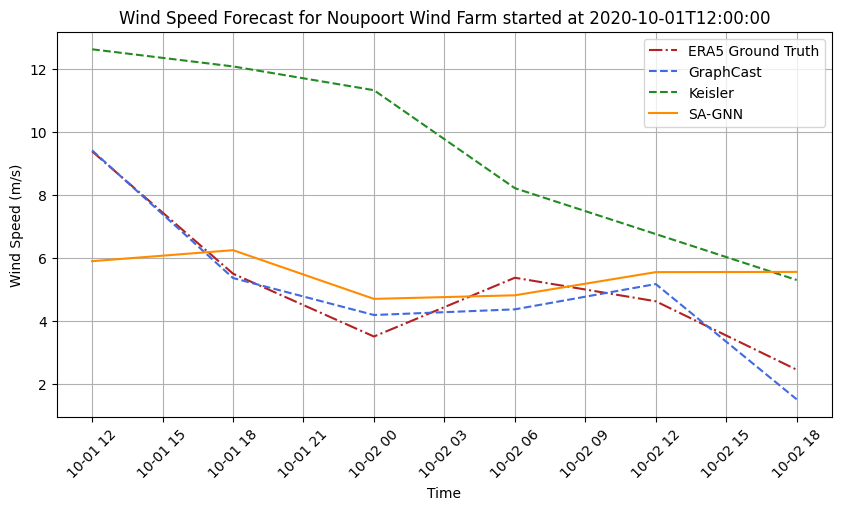

In [65]:
forecast_start = '2020-10-01 12:00:00'
forecast_start = np.datetime64(forecast_start)

fig = plt.figure(figsize=(10, 5))

colours = ['firebrick', 'royalblue', 'forestgreen', 'darkorange']
line_styles = ['-.', '--', '--', '-']

for i, (model, data) in enumerate(models.items()):
    data = data.sel(time=forecast_start)
    times = forecast_start + np.timedelta64(6, 'h') * np.arange(data.prediction_timedelta.size)
    plt.plot(times, data.wind_speed, label=model, color=colours[i], linestyle=line_styles[i])

plt.title(f'Wind Speed Forecast for Noupoort Wind Farm started at {forecast_start}')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.legend()
plt.show()